# Numpy

## Qu'est-ce?

Les listes python sont extensibles à volonté et peuvent contenir n'importe quoi. On les créer avec les crochets:`uneListe=[]`. Dans un cadre scientifique, pour des questions de performances, on travaille essentiellement avec `numpy` qui crée des tenseurs, c.à.d:

* des tableaux multi-dimensionnel 
* de taille fixée
* qui ne peuvent contenir qu'un seul type d'objet : `int` ou `float` (numpy gère d'autre types, mais on ne les utisera pas)
* rapidement manipulable dans leur ensemble

L'ordre d'un tenseur, c'est son nombre d'indices:

* tenseur d'ordre 1 = vecteur, ex: pour stocker du son
* tenseur d'ordre 2 = matrice, ex: pour stocker une image
* tenseur d'ordre 3 = volume, ex: pour stocker une vidéo
* tenseur d'ordre 4 = très utile quand on fait du deep-learning


In [32]:
import numpy as np

On précise l'affichage des tableau numpy :

* 3 décimales après la virgule
* on supprime la notation scientifique des nombres
* on veut de grandes lignes


In [33]:
np.set_printoptions(precision=3,suppress=True,linewidth=5000)

## Type des données

Pour les proba-stats, nous utiliserons essentiellement des tableaux contenant des flottant de 64 bit ou des d'entier de 64 bits. Mais par exemple, quand on manipule des images, les pixels sont des entiers de 8 bits. 

### Tableau de flotant

In [34]:
"""un vecteur initialisé par une liste de valeurs. """
vec=np.array([1.,2,3,4])
"""une matrice"""
mat=np.array([ [1.,2,0],[3,4,0]])
"notez qu'on a mis au moins un coefficient flottant (avec un point)"

print("vec\n",vec)
print("mat\n",mat)

vec
 [1. 2. 3. 4.]
mat
 [[1. 2. 0.]
 [3. 4. 0.]]


Les principales caractéristiques d'un tableau sont:

* `dtype` = data-type
* `shape` = sa forme

In [35]:
print("vec:",vec.dtype,vec.shape)
print("mat:",mat.dtype,mat.shape)

vec: float64 (4,)
mat: float64 (2, 3)


In [36]:
"""vecteur de flotant initialisé à 0, matrice de flottant initialisé à 1"""
vec_zero=np.zeros(shape=[5])
mat_un=np.ones(shape=[5,4])
print("\n vec_zero\n",vec_zero)
print("\n mat_un \n",mat_un)


 vec_zero
 [0. 0. 0. 0. 0.]

 mat_un 
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


### Tableau d'entier

Attention, depuis python 3, les indices de tableau doivent nécessairement être des entier. Par exemple `a[3.0]` renvoie une erreur.  

Du coup, si l'on veut faire un tableau qui contiens plusieurs indices, il faut créer un tableau d'entier. C'est d'ailleurs le seul cas où l'on va utiliser de tels tableaux.

In [37]:
indices=np.array([0,3,1])
vec = np.array([0.,2,4,6,8,10])
print(indices)
print(indices.dtype)
print(vec[indices])

[0 3 1]
int64
[0. 6. 2.]


In [38]:
"""convertissons"""
vec=np.array([1.5,2.5,3.5,4.5])
print(vec," dtype:",vec.dtype)
vec=vec.astype(np.int64)
print(vec," dtype:",vec.dtype)
vec=vec.astype(np.float64)
print(vec," dtype:",vec.dtype)


[1.5 2.5 3.5 4.5]  dtype: float64
[1 2 3 4]  dtype: int64
[1. 2. 3. 4.]  dtype: float64


***Exo :*** modifiez $(1\heartsuit)$ le vecteur `indices` ci-dessus, pour qu'il contienne des flottant. Indiquez le message d'erreur qui en découle.  

## Opérations élément par élément

In [39]:
"""toutes ces opérations sur les tenseurs sont faites terme à terme."""

vec = np.array([1., 2, 3, 4])
vec_carre = vec**2
vec2= vec+vec_carre
vec3=7*vec
vec4=np.sin(vec)
vec5=vec2*vec3


print("vec",vec)
print("vec_carre",vec_carre)
print("vec2",vec2)
print("vec3",vec3)
print("vec4",vec4)
print("vec5",vec5)

vec [1. 2. 3. 4.]
vec_carre [ 1.  4.  9. 16.]
vec2 [ 2.  6. 12. 20.]
vec3 [ 7. 14. 21. 28.]
vec4 [ 0.841  0.909  0.141 -0.757]
vec5 [ 14.  84. 252. 560.]


Toutes ces fonctions numpy ne modifient pas l'argument de départ (une 'copie' est faite). 

In [40]:
vec = np.array([1., 2, 3, 4])
vec1=vec**2
vec2=np.sin(vec)

print(vec.round())
print(vec1)
print(vec2)

"""vec n'a pas changer"""
print("vec",vec)

[1. 2. 3. 4.]
[ 1.  4.  9. 16.]
[ 0.841  0.909  0.141 -0.757]
vec [1. 2. 3. 4.]


De nombreuses fonctions numpy peuvent s'utiliser avec deux syntaxes différentes : 
        
1. `np.fonction(tenseur)`
        
2. `tenseur.fonction()`

Et même dans le second cas, une copie du tenseur est faites ; c'est un peu trompeur car la syntaxe objet `tenseur.fonction()` suggère en générale une opération modifiant l'objet (opération "inPlace")

In [10]:
vec = np.array([1.1234, 2.1234, 3.1234, 4.1234])

"""arrondir"""
vec1= np.round(vec,1)
"""idem avec syntaxe différente"""
vec2= vec.round(1)

print("vec1", vec1)
print("vec2", vec2)


"""vec n'a pas changer (cependant il ne s'affiche qu'avec 3 décimales à cause de notre entête)"""
print("vec", vec)

vec1 [1.1 2.1 3.1 4.1]
vec2 [1.1 2.1 3.1 4.1]
vec [1.123 2.123 3.123 4.123]


## Changer des éléments dans un tenseur

### Directement

In [11]:
vec = np.array([1., 2, 3, 4])
mat = np.array([[1., 2], [3, 4]])

"""modifier un élément"""
vec[0] = 10.  # la numérotation commence à zéro
mat[1, 1] = 10.

""" attention, on a ainsi modifier les objets initiaux"""
print("vec et mat après modification")
print(vec)
print(mat)

"""modifier un bloc d'élément"""
vec_zero = np.zeros(shape=[5])
vec_zero[0:3]=5 # [0:3] indique les indices dans l'intervalle [0,3[

mat_un = np.ones(shape=[5, 4])
mat_un[0:2,0:3]=7

print("\nvec_zero\n", vec_zero)
print("\nmat_un\n", mat_un)

vec et mat après modification
[10.  2.  3.  4.]
[[ 1.  2.]
 [ 3. 10.]]

vec_zero
 [5. 5. 5. 0. 0.]

mat_un
 [[7. 7. 7. 1.]
 [7. 7. 7. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


### Via une 'vue' sur les données

Attention, on touche ici à une des grandes difficultés de `numpy`; difficulté qu'on retrouve partout en informatique: le passage de données par copie ou par référence.  

In [42]:
mat_un = np.ones(shape=[5, 4])

part=mat_un[0:2, 0:3]
"""toute la partie est mise à 7"""
part[:,:]=7

"""et là, observez : c'est à la fois logique et surprenant:"""
print("\n mat_un\n", mat_un)
print("\n part\n", part)


 mat_un
 [[7. 7. 7. 1.]
 [7. 7. 7. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]

 part
 [[7. 7. 7.]
 [7. 7. 7.]]


Comment ça marche :

        mat_un = np.ones(shape=[5, 4])
        
L'ordi crée un tableau dans la mémoire de l'ordinateur. la variable 'mat_un' est une vue (=référence) sur ce tableau.
        
        part=mat_un[0:2, 0:3]
        
la variable 'part' est une vue sur une partie de ce tableau en mémoire. en effectuant :
        
        part[:,:]=7
        
on modifie une partie du tableau en mémoire. 

Par contre quand on fait :
        
        a=mat_un[0,0]
        
la variable `a` contient une copie du coefficient `mat_un[0,0]`. Modifier `a` ne modifie pas le tableau en mémoire. La preuve :

In [13]:
mat_un = np.ones(shape=[5, 4])
a=mat_un[0,0]
a=7
print('a=',a)
print("\n mat_un\n", mat_un)

a= 7

 mat_un
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


***Exo :*** Que sont les tenseurs a,b,c,.... ci-dessous $(4\diamondsuit)$?
Mettez la réponse sur du papier, faites bien la différence entre les vecteurs et les matrices
puis vérifiez avec un `print`
Indiquez pour chaque cas, s'il s'agit d'un nombre, d'un vecteur ou d'une matrice.

In [44]:
"""remplissons une matrice par une double boucle"""
nbLigne = 3
nbColonne = 4
mat = np.zeros([nbLigne, nbColonne])
for i in range(nbLigne):
    for j in range(nbColonne):
        mat[i, j] = i + j

print("\nmat \n",mat)

a = mat[0, :]
aBis = mat[0:1, :]
b = mat[:,0]
c = mat[:, nbColonne - 1]
d = mat[:,  - 1]  # ça: c'est idem que la ligne précédente
e = mat[-1,-1]
f = mat[0:2,:]
g = mat[0:2, 0:1]


mat 
 [[0. 1. 2. 3.]
 [1. 2. 3. 4.]
 [2. 3. 4. 5.]]


## Sélection par valeurs

### Via les tableaux de booléens

In [45]:
a=np.array([0.,1.,2,3,4,-1])
print(a)
print(a<0)
print(a>=0)
print(a[a<0])
print(a[a>=0])
print(a[a==0])
""" le 'and' et 'or' dans les indices n'est pas le même que les 'and' et 'or' classiques"""
print(a[(a>0)&(a<4)])
print(a[(a>0)|(a<4)])

[ 0.  1.  2.  3.  4. -1.]
[False False False False False  True]
[ True  True  True  True  True False]
[-1.]
[0. 1. 2. 3. 4.]
[0.]
[1. 2. 3.]
[ 0.  1.  2.  3.  4. -1.]


Contrairement à la selection par indice (ex : `a[:,2]`), la selection par valeur créer une "copie", donc préserve l'originale.

In [16]:
a=np.array([0.,1.,2,3,4,-1])
b = a[a >= 0]
b[:] = 10
print('b',b)
""" 'a'  n'a pas changé, ouf. """
print('a',a)

b [10. 10. 10. 10. 10.]
a [ 0.  1.  2.  3.  4. -1.]


***Important:*** Quand on a un doute sur 'copie' ou 'référence', on teste, comme ci-dessus.

### Via des conditions

Pour sélectionner des éléments dans un tableau selon un critère complexe,
il faut faire une boucle, et utiliser une liste car on ne sait jamais combien d'élément on va sélectionner à l'avance. 

In [17]:
nbSimu=1000
a=np.random.randint(0,100,nbSimu)
res=[]
for i in range(nbSimu):
    if a[i]%3==0 and a[i]%7==0: res.append(a[i])
"""à la fin, on repasse le résultat en tableau numpy"""
res=np.array(res)
print(res)

[21  0 42 84  0  0 42 63 21 84 42 84 84 42 42 21  0 84  0 21 63  0 63 63 63 84 63 42 21 84 42  0  0 84 42 21 84 63 63 21 42]


## Algèbre linéaire

Attention, en numpy les vecteurs, les matrices lignes et les matrices colonnes sont des objets différents:

* vecteur.shape = (?)
* matrice_ligne.shape = (1,?)
* matrice_colonne.shape = (?,1)
* matrice_quelconque.shape = (?,?)

Observez bien les sorties consoles: les vecteurs s'écrivent avec 1 crochet, les matrices avec 2 crochets.

### Multiplication matricielle

`np.matmul()` s'applique uniquement entre matrices.

In [18]:
size=3
mat_col=np.ones(shape=[size,1])
mat_lin=np.ones(shape=[1,size])
mat_square=np.ones(shape=[size,size])

print("mat_col\n",mat_col)
print("mat_lin\n",mat_lin)
print("mat_square\n",mat_square)

print("mat_square × mat_col\n",np.matmul(mat_square,mat_col) )
print("mat_lin × mat_square\n",np.matmul(mat_lin,mat_square))
print("mat_lin × mat_square × mat_col\n", np.matmul(np.matmul(mat_lin,mat_square),mat_col))


mat_col
 [[1.]
 [1.]
 [1.]]
mat_lin
 [[1. 1. 1.]]
mat_square
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
mat_square × mat_col
 [[3.]
 [3.]
 [3.]]
mat_lin × mat_square
 [[3. 3. 3.]]
mat_lin × mat_square × mat_col
 [[9.]]


sinon on peut utiliser `np.dot()` qui permet les multiplications matrice $\times$ vecteur, matrice $\times$ matrice, vecteur $\times$  vecteur (=produit scalaire)

In [47]:
size=3
vec0=np.ones(shape=[size])
vec1=2*np.ones(shape=[size])
mat_square=np.ones(shape=[size,size])

print("vec0 * vec1\n",np.dot(vec0,vec1))
print("vec0 * mat_square\n",np.dot(vec0,mat_square))
print("mat_square * vec0\n",np.dot(mat_square,vec0))
print("mat_square * mat_square\n",np.dot(mat_square,mat_square))

vec0 * vec1
 6.0
vec0 * mat_square
 [3. 3. 3.]
mat_square * vec0
 [3. 3. 3.]
mat_square * mat_square
 [[3. 3. 3.]
 [3. 3. 3.]
 [3. 3. 3.]]


et si vous avez python 3.5+, vous pouver utilisez l'opérateur @ qui rend les codes plus lisibles

In [20]:
print("vec0 * vec1\n",vec0 @ vec1)
print("vec0 * mat_square\n",vec0 @ mat_square)
print("mat_square * vec0\n",mat_square @ vec0)
print("mat_square * mat_square\n",mat_square @  mat_square)

vec0 × vec1
 6.0
vec0 × mat_square
 [3. 3. 3.]
mat_square × vec0
 [3. 3. 3.]
mat_square × mat_square
 [[3. 3. 3.]
 [3. 3. 3.]
 [3. 3. 3.]]


***Exo:*** Multipliez $(2\heartsuit)$ matriciellement des matrices de taille non-compatible.
Extrayez la partie intéressante du message d'erreur.

### inverse et transposée 

Notez que le pseudo-inverse permet d'inverser les matrices non-inversibles (testez). 

In [21]:
size=3
mat=np.zeros(shape=[size,size])
for i in range(size):
    mat[i,i]=1
mat[0,size-1]=2


print("mat\n",mat )
print("mat^T\n",mat.T)
print("mat^(-1)\n",np.linalg.inv(mat))
print("mat^(-1)-pseudo-inverse\n",np.linalg.pinv(mat))

mat
 [[1. 0. 2.]
 [0. 1. 0.]
 [0. 0. 1.]]
mat^T
 [[1. 0. 0.]
 [0. 1. 0.]
 [2. 0. 1.]]
mat^(-1)
 [[ 1.  0. -2.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
mat^(-1)-pseudo-inverse
 [[ 1.  0. -2.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


### Vecteur propre et valeur propre

Souvenez-vous qu'en anglais valeur/vecteur 'propre' c'est 'eigen' value/vector

In [48]:
size=4
"""une matrice aléatoire auquel on fait subir une opération de normalisation (laquelle?)"""
mat=np.random.uniform(low=0,high=10,size=[size,size])
rowSum=np.sum(mat,axis=1)
""" mat[i,j]=mat[i,j]/rowSum(i)  """
for i in range(size): mat[i,:]/=rowSum[i]

eigVal,eigVec=np.linalg.eig(mat)
print("\nmat\n", mat )
print("\neigVal\n",np.real(eigVal))
print("\neigVec\n", np.real(eigVec))


mat
 [[0.331 0.366 0.175 0.128]
 [0.308 0.003 0.303 0.386]
 [0.001 0.557 0.129 0.313]
 [0.316 0.221 0.025 0.438]]

eigVal
 [ 1.     0.157  0.157 -0.413]

eigVec
 [[ 0.5   -0.244 -0.244  0.174]
 [ 0.5    0.153  0.153 -0.712]
 [ 0.5    0.628  0.628  0.673]
 [ 0.5   -0.215 -0.215  0.101]]


***A vous:*** 

* Pour la `mat` précédent: pourquoi 1 est-il valeur propre $(2\heartsuit)$? Quel est le vecteur propre associé $(1\heartsuit)$? 

* `np.linalg.eig` donne-t-il les vecteurs propres à droite ou à gauche $(1\heartsuit)$? Sont-ils disposés en ligne ou bien en colonne $(1\heartsuit)$?

* De manière générale, toutes les matrices sont-elles diagonalisables $(1\heartsuit)$?  A quoi servent les `np.real()` dans le programme précédent $(1\heartsuit)$?  

* laquelle de ces deux formules est la bonne $(1\heartsuit)$?

        Diag = P^-1 @ mat @ P   

ou

        Diag = P @ mat @ P^-1
        
Vérifiez avec python. Aide: Pour transformez un vecteur en matrice diagonale, utilisez `np.diag(vecteur)`

## Application :   loi forte des grands nombres

### Illustration graphique
***Théorème:*** Soit $(X_n)$ une suite de v.a, qui admet une espérance, on a: 
$$
\lim_n \frac 1 n  (X_0+....+X_{n-1}) =  \mathbf E[X_0]
$$

Remarque : pour illustrer ce théorème, on va tracer la courbe 
$$
   n \to  \frac 1 n  (X_0+....+X_{n-1})
$$
mais on n'est pas obligé de l'évaluer pour tous les $n$ (ex: on peut aller par pas de 40)

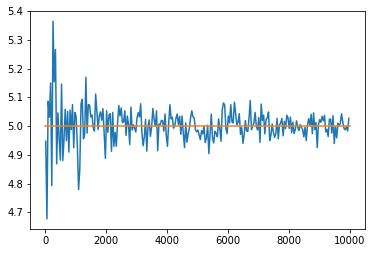

In [50]:
import matplotlib.pyplot as plt
% matplotlib inline

""" np.arange c'est comme range() sauf que cela donne un tableau numpy"""
n_max=10000
ns=np.arange(10,n_max,40)
means=[]
for n in ns:
    simus=np.random.uniform(0,10,size=n)
    means.append(np.mean(simus))

fig,ax=plt.subplots()
ax.plot(ns,means)
ax.plot([0,n_max],[5,5]);

***A vous:*** $(2\heartsuit)$ J'ai volontairement fait une erreur dans le programme précédent, une erreur que font beaucoup d'étudiant chaque année. Relisez attentivement la loi des grands nombre, comparez cet énoncé avec le programme ci-dessus. Trouvez le bug.

### Illustration numérique

In [51]:
nbSimu = 10000
"""un échantillon de va de loi uniforme sur [0,1]"""
X1 = np.random.random(size=nbSimu)
""" un échantillon de va de loi normale (=gaussienne), centrée réduite par défaut.   """
X2 = np.random.normal(size=nbSimu)
""" un échantillon de va de loi de Poisson"""
X3 = np.random.poisson(1, size=nbSimu)

print(len(X1[X1<0.7])/nbSimu,"valeur attendue:",0.7)
print(sum( (X1-0.5)**2)/nbSimu,"valeur attendue:",1/12)
print(len(X2[X2<0.])/nbSimu,"valeur attendue:",0.5)



0.7005 valeur attendue: 0.7
0.08349414764097192 valeur attendue: 0.08333333333333333
0.5014 valeur attendue: 0.5


Donnez ci-dessus les valeurs attendue, et révisez ainsi votre loi de Poisson $(3\times 1\heartsuit)$.

In [52]:
print(np.sum(X2**2)/nbSimu,"valeur attendue:")
print(len(X3[X3==3])/nbSimu,"valeur attendue:")
print(len(X3[X3!=0])/nbSimu,"valeur attendue:")

0.9885952712068063 valeur attendue:
0.0611 valeur attendue:
0.6317 valeur attendue:


### Monte carlo


***A vous:*** $(3\times 2\heartsuit)$ à l'aide de variables uniformes, en utilisant la loi forte des grands nombres, estimez  
$$
 \int_0^1  x \ dx  \qquad \text{et} \qquad  \int_0^{\frac 12 }  \frac x {\ln(x)}\  dx \qquad \text{et} \qquad  \int_0^1 \frac  1 x\  dx
$$   
Cette méthode pour calculer des intégrales est appelée : Méthode de Monte Carlo


## Application : moyenne et écart-type

Simulons des échantillons:

In [25]:
nbData=100
X1=np.random.random(size=nbData)
X2=np.random.normal(size=nbData);

* calculons leur moyenne, qu'on peut  appeler : mu_hat (mu pour espérance, et hat pour estimation)
* calculons leur écart type empirique : sigma_hat (sigma pour écart type, et hat pour estimation)

La formule écart type empirique  est ...

In [26]:
print("loi uniforme sur [0,1]")
print("* mu_hat",X1.mean())
print("* sigma_hat",X1.std())

print("loi normale")
print("* mu_hat", X2.mean())
print("* sigma_hat", X2.std())

loi uniforme sur [0,1]
* mu_hat 0.5012182491359483
* sigma_hat 0.3025619268091313
loi normale
* mu_hat -0.13541845638430194
* sigma_hat 1.0389979183900737


A l'aide des estimateurs, vérifiez expérimentallement les résultats suivants $(4\times 2\heartsuit)$:

* l'espérance de la somme de deux variables aléatoires c'est la somme des espérances.
* la variance de la somme de deux variables aléatoires c'est ...
* soient $X$ une v.a, $a$ et $b$ des constantes. On a: $\mathbf E[aX+b]= ...$ et $\mathbf V[aX+b]= ...$. 
* L'espérance du carré d'une v.a est toujours plus... que le carré de l'espérance. 

## Numpy or not numpy

Quand on écrit un programme il faut toujours se demander si on va utiliser des tenseurs `numpy` ou pas. Par exemple, considérons la fonction suivante:

In [27]:
def f(x):
    return x**2*(1-x)**2+1   

Cette fonction fonctionne (!)  pour `x` scalaire, mais aussi pour `x` tenseur: car les opérations puissance `**`, somme `+` et produit `*` sont bien définies sur les tenseurs. Ainsi on peut tracer le graphe de `f` de deux manières différentes:

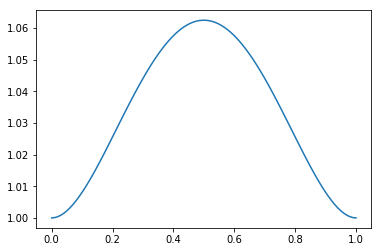

In [28]:
"""première méthode"""
xs=np.linspace(0,1,100)
ys=[]
for x in xs:
    ys.append(f(x))
plt.plot(xs,ys);

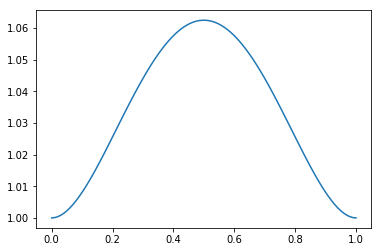

In [29]:
""" seconde méthode"""
plt.plot(xs,f(xs));

La seconde méthode est plus élégante mais aussi beaucoup plus rapide.

Par contre, considérons la fonction:

In [31]:
def g(x):
    if 0<x<0.5: return x
    elif 0.5<x<2: return 2*x
    else : return 0

Cette fonction `g` ne fonctionne pas quand `x` est un tenseur numpy (essayez $(1\heartsuit)$, observez le message d'erreur, vous le rencontrerez sans doute plus tard). On peut transformer cette fonction pour quelle marche avec `numpy` mais c'est un peu technique. 

Le conseil: dans un premier temps, ne vous prenez pas trop la tête. Faites au plus simple même si ce n'est pas le plus performant. Vous apprendrez les astuces au fur et à mesure. 

## Sous le capot de numpy

### Des données à plats. 

Peu importe la `shape` ou le `dtype` (=data_type): dans la mémoire, les tableaux `numpy` sont stockés sous la forme d'un tableau 1D, par paquets-de-8bits. Quand vous changer la `shape`, les données ne change pas du tout, c'est uniquement la façon de les parcourir qui change. 

In [84]:
" ces 4 objets sont associées aux même données toutes plates."
vec=np.arange(0,9,1)
print("vec\n",vec)
mat_square=vec.reshape([3,3])
print("mat_square\n",mat_square)
mat_col=mat_square.reshape([9,1])
print("mat_col\n",mat_col)
mat_line=mat_square.reshape([1,9])
print("mat_line\n",mat_line)

vec
 [0 1 2 3 4 5 6 7 8]
mat_square
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
mat_col
 [[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]]
mat_line
 [[0 1 2 3 4 5 6 7 8]]


### l'attribut 'strides'

Quand on change la `shape`, on chage aussi l'attribut `strides`: il indique comment on passe d'une case à l'autre.

### ex:  vecteur 

Dans ce cas,  `strides` est un scalaire: il indique de combien de paquet-de-8bits il faut glisser pour aller de `vec[i]` à `vec[i+1]`. Cela dépend uniquement du `dtype`

In [85]:
a=np.zeros(shape=5,dtype=np.uint8)
print("np.uint8, strides:",a.strides)
a=np.zeros(shape=5,dtype=np.int32)
print("np.int32, strides:",a.strides)
a = np.zeros(shape=5, dtype=np.int64)
print("np.int64, strides:",a.strides)

np.uint8, strides: (1,)
np.int32, strides: (4,)
np.int64, strides: (8,)


### ex:  matrice

Dans ce cas,  `strides` est une paire. 

* `strides[0]` indique de combien de paquet-de-8bits il faut glisser pour passer de la case `mat[i,j]` à la case `mat[i+1,j]` 
* `strides[1]` indique de combien de paquet-de-8bits il faut glisser pour passer de la case ``mat[i,j]`` à la case ``mat[i,j+1]``

Illustrons cela avec uniquement `dtype=np.uint8`. 

In [83]:
a = np.zeros(shape=(2,4), dtype=np.uint8)
print("shape=(2,4), strides:", a.strides)

a = np.zeros(shape=(30, 5), dtype=np.uint8)
print("shape=(30,4), strides:", a.strides)

shape=(2,4), strides: (4, 1)
shape=(30,4), strides: (5, 1)


***A vous:*** Essayez de répondres à ces 3 questions sans faire de `print` $(3\heartsuit)$ puis avec un `print` $(3\heartsuit)$. 

* quelle est la stride de `np.zeros(shape=(2,4), dtype=np.int32)`
* quelle est la stride de `np.zeros(shape=(30,5), dtype=np.int32)`
* A quoi correspond la stride d'un tenseur de dimension 3.